In [1]:
# Step 1: Data Understanding
import pandas as pd

# Load dataset (use forward slashes for Windows paths)
df = pd.read_csv("employee_attrition.csv")

# First 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Dataset info
print("\nDataset Info:")
print(df.info())

# Missing values check
print("\nMissing values:")
print(df.isnull().sum())

# Fill missing values (categorical → mode, numeric → median)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

First 5 rows of the dataset:
   Age Department  Years_At_Company  Salary Overtime  JobSatisfaction  \
0   29      Sales                12      38       No                3   
1   23    Finance                12      98       No                1   
2   39       Tech                19      46       No                1   
3   37    Finance                14      46       No                5   
4   36       Tech                16      90       No                4   

  Attrition  
0        No  
1       Yes  
2        No  
3       Yes  
4       Yes  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               50 non-null     int64 
 1   Department        50 non-null     object
 2   Years_At_Company  50 non-null     int64 
 3   Salary            50 non-null     int64 
 4   Overtime          50 non-null     object
 5   JobS

In [2]:
# Step 2: Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# Features & Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (35, 6)
Testing set shape: (15, 6)


In [3]:
# Step 3: Model Building
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Number of trees and features
print("Number of trees:", len(rf.estimators_))
print("Number of features:", rf.n_features_in_)

Number of trees: 100
Number of features: 6


Accuracy: 0.4666666666666667

Confusion Matrix:
 [[5 2]
 [6 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.50      0.25      0.33         8

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.48      0.47      0.44        15



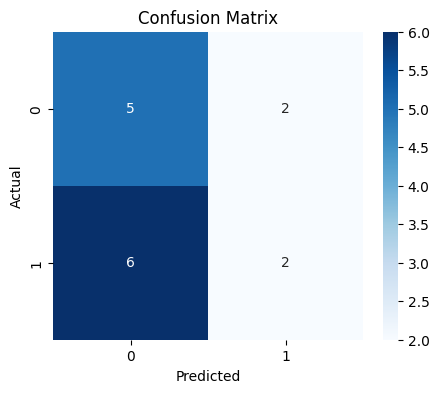

In [4]:
# Step 4: Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Tuned Accuracy: 0.4666666666666667

Tuned Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.50      0.25      0.33         8

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.48      0.47      0.44        15


Top 10 Important Features:
            Feature  Importance
3            Salary    0.306880
0               Age    0.249353
2  Years_At_Company    0.181361
5   JobSatisfaction    0.126319
1        Department    0.102694
4          Overtime    0.033393


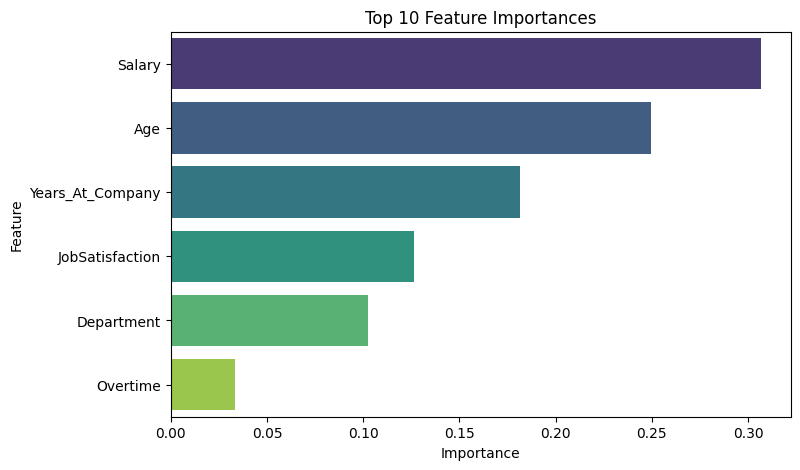

In [5]:
# Step 5: Model Tuning
# Try with different hyperparameters
rf_tuned = RandomForestClassifier(
    n_estimators=200, max_depth=10, criterion="entropy", random_state=42
)
rf_tuned.fit(X_train, y_train)

y_pred_tuned = rf_tuned.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Report:\n", classification_report(y_test, y_pred_tuned))

# Feature importance
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_tuned.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features:")
print(importances.head(10))

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importances.head(10),
    hue="Feature",
    dodge=False,
    legend=False,
    palette="viridis"
)
plt.title("Top 10 Feature Importances")
plt.show()

In [6]:
# Step 6: Insights & Conclusion
print("\n--- Insights & Conclusion ---")

# Most important features
print("Most important predictors of attrition are:\n", importances.head(5))

# HR manager recommendations
print("""
If I were the HR manager, I would act on these insights:
- If Overtime is a top factor → Reduce excessive overtime & balance workload.
- If Monthly Income is important → Review salary structure to improve retention.
- If Job Role/Department shows high attrition → Provide mentorship & better career growth.
- If Work-Life Balance or Environment Satisfaction matters → Encourage flexible work and improve work culture.
- Regular employee surveys → Address dissatisfaction early to reduce turnover.
""")


--- Insights & Conclusion ---
Most important predictors of attrition are:
             Feature  Importance
3            Salary    0.306880
0               Age    0.249353
2  Years_At_Company    0.181361
5   JobSatisfaction    0.126319
1        Department    0.102694

If I were the HR manager, I would act on these insights:
- If Overtime is a top factor → Reduce excessive overtime & balance workload.
- If Monthly Income is important → Review salary structure to improve retention.
- If Job Role/Department shows high attrition → Provide mentorship & better career growth.
- If Work-Life Balance or Environment Satisfaction matters → Encourage flexible work and improve work culture.
- Regular employee surveys → Address dissatisfaction early to reduce turnover.

